![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

In [35]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


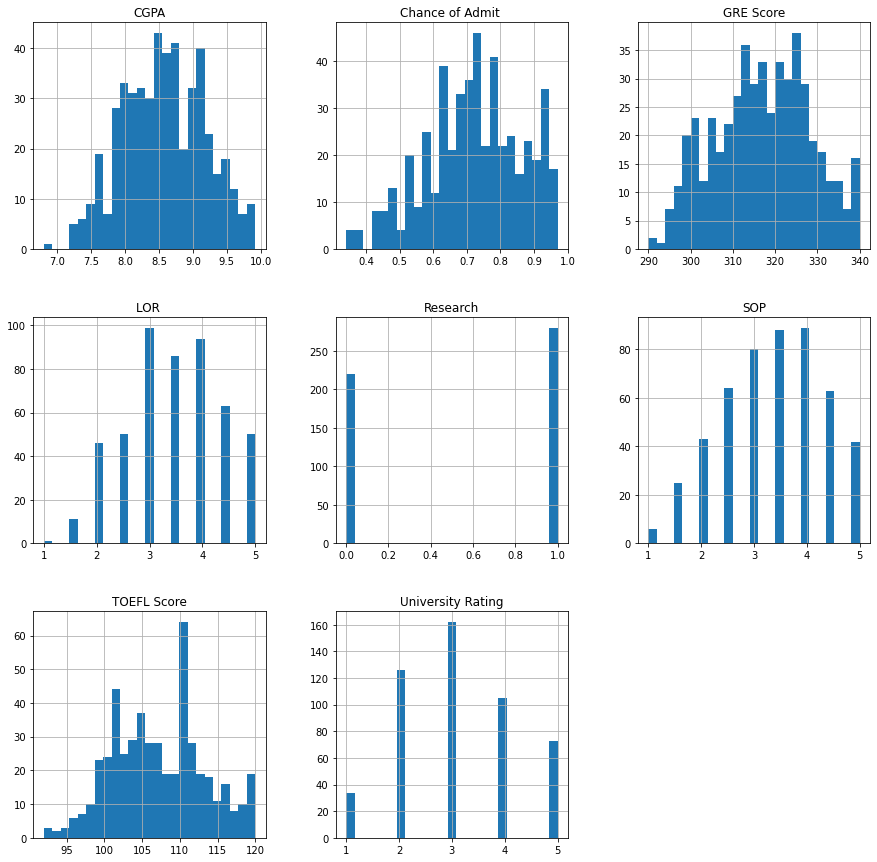

In [36]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [37]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [58]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [59]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [45]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


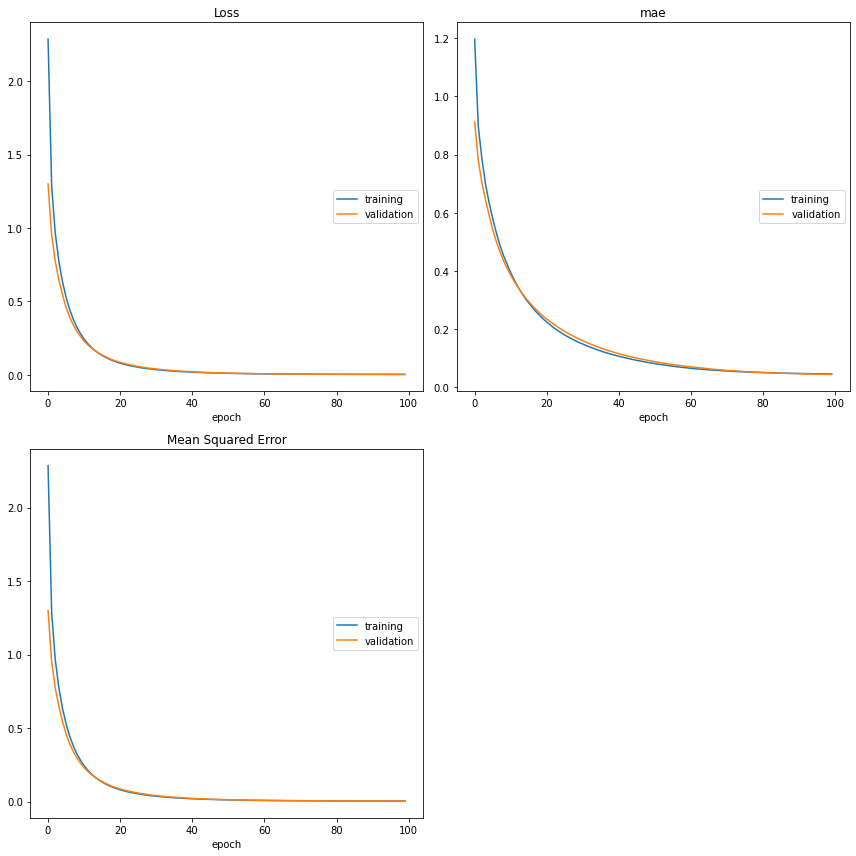

Loss
	training         	 (min:    0.004, max:    2.285, cur:    0.004)
	validation       	 (min:    0.004, max:    1.299, cur:    0.004)
mae
	training         	 (min:    0.046, max:    1.196, cur:    0.046)
	validation       	 (min:    0.045, max:    0.912, cur:    0.045)
Mean Squared Error
	training         	 (min:    0.004, max:    2.285, cur:    0.004)
	validation       	 (min:    0.004, max:    1.299, cur:    0.004)
5/5 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0448 - mse: 0.0037
Mean Absolute Error (MAE): 0.0448 | Mean Squared Error (MSE): 0.0037


In [46]:
from livelossplot import PlotLossesKeras
# Optimizadores disponibles: https://keras.io/api/optimizers/
# Funciones de pérdida disponibles para regresión: https://keras.io/api/losses/regression_losses/
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamiento de la red neuronal
model.fit(X_train, y_train, verbose=1, epochs=100, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()])

# Presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE)
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [54]:
# Celda 2
# Celda 2

# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Definimos dos capas densas con un tamaño de salida de 512 y 256 a output_var y un input_shape de dims
model.add(Dense(512, input_shape=(dims,), activation='relu'))
model.add(Dense(256, activation='relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
Total params: 135,424
Trainable params: 135,424
Non-trainable params: 0
_________________________________________________________________
None


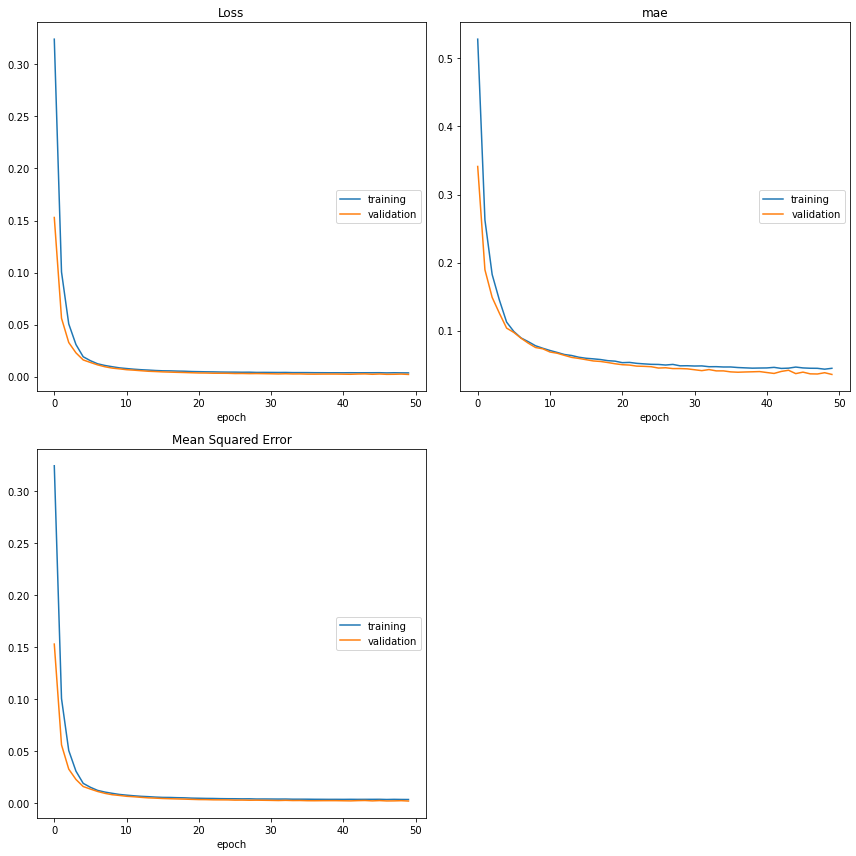

Loss
	training         	 (min:    0.004, max:    0.324, cur:    0.004)
	validation       	 (min:    0.002, max:    0.153, cur:    0.002)
mae
	training         	 (min:    0.043, max:    0.528, cur:    0.045)
	validation       	 (min:    0.036, max:    0.341, cur:    0.036)
Mean Squared Error
	training         	 (min:    0.004, max:    0.324, cur:    0.004)
	validation       	 (min:    0.002, max:    0.153, cur:    0.002)
5/5 [==============================] - 0s 0s/step - loss: 0.0040 - mae: 0.0469 - mse: 0.0040
Mean Absolute Error (MAE): 0.0469 | Mean Squared Error (MSE): 0.0040


In [57]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Entrenamos la red neuronal con 20 épocas
model.fit(X_train, y_train, verbose=1, epochs=50, validation_data=(X_val, y_val), callbacks=[PlotLossesKeras()])

loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [62]:
# Celda 3
# Limpiamos la sesión para no ocupar tanta memoria
K.clear_session()

# Definimos una red neuronal con la función Sequential()
model = Sequential()

# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Capa 1
model.add(Dense(128, input_shape=(dims,), activation='relu'))
model.add(Dropout(0.2)) # https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

# Capa 2
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(output_var, activation='sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
None


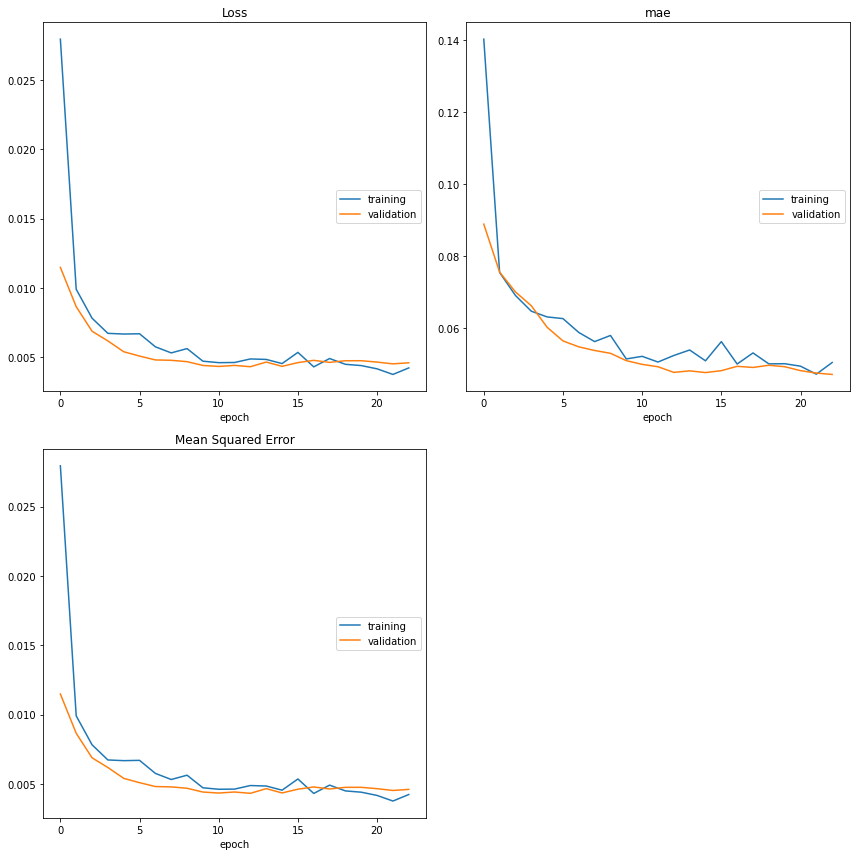

Loss
	training         	 (min:    0.004, max:    0.028, cur:    0.004)
	validation       	 (min:    0.004, max:    0.011, cur:    0.005)
mae
	training         	 (min:    0.047, max:    0.140, cur:    0.050)
	validation       	 (min:    0.047, max:    0.089, cur:    0.047)
Mean Squared Error
	training         	 (min:    0.004, max:    0.028, cur:    0.004)
	validation       	 (min:    0.004, max:    0.011, cur:    0.005)
5/5 [==============================] - 0s 1ms/step - loss: 0.0040 - mae: 0.0465 - mse: 0.0040
Mean Absolute Error (MAE): 0.0465 | Mean Squared Error (MSE): 0.0040


In [64]:
from keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Entrenamos la red neuronal con 100 épocas un batch zise de 32
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[PlotLossesKeras(), early_stop])

# Evaluamos el desempeño del modelo
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error (MAE): {mae:.4f} | Mean Squared Error (MSE): {mse:.4f}")

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [65]:
# Celda 4
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 3ms/step - loss: 0.0040 - mae: 0.0465 - mse: 0.0040


[0.00400311965495348, 0.046459831297397614, 0.00400311965495348]